# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
# Загрузим библиотеки
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [3]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [4]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим информацию про датафрейм для региона 0

In [5]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


Посмотрим информацию по датасэту для региона 1

In [8]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [10]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


Посмотрим информацию по датафрейму для региона 2

In [11]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [13]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [14]:
# В данном случае для обучения можно убрать данные с id
geo_data_0 = geo_data_0.drop(['id'], axis=1)
geo_data_1 = geo_data_1.drop(['id'], axis=1)
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [15]:
# Разделим данные для региона 0 на обучающую и валидационную выборки в соотношении 75:25
geo_data_0_train, geo_data_0_valid = train_test_split(geo_data_0, test_size=0.25, random_state=12345)
geo_data_0_train.shape, geo_data_0_valid.shape

((75000, 4), (25000, 4))

In [16]:
features_geo_data_0_train = geo_data_0_train.drop(['product'], axis=1)
target_geo_data_0_train = geo_data_0_train['product']
features_geo_data_0_valid = geo_data_0_valid.drop(['product'], axis=1)
target_geo_data_0_valid = geo_data_0_valid['product']

In [17]:
# Разделим данные для региона 1 на обучающую и валидационную выборки в соотношении 75:25
geo_data_1_train, geo_data_1_valid = train_test_split(geo_data_1, test_size=0.25, random_state=12345)
geo_data_1_train.shape, geo_data_1_valid.shape

((75000, 4), (25000, 4))

In [18]:
features_geo_data_1_train = geo_data_1_train.drop(['product'], axis=1)
target_geo_data_1_train = geo_data_1_train['product']
features_geo_data_1_valid = geo_data_1_valid.drop(['product'], axis=1)
target_geo_data_1_valid = geo_data_1_valid['product']

In [19]:
# Разделим данные для региона 2 на обучающую и валидационную выборки в соотношении 75:25
geo_data_2_train, geo_data_2_valid = train_test_split(geo_data_2, test_size=0.25, random_state=12345)
geo_data_2_train.shape, geo_data_2_valid.shape

((75000, 4), (25000, 4))

In [20]:
features_geo_data_2_train = geo_data_2_train.drop(['product'], axis=1)
target_geo_data_2_train = geo_data_2_train['product']
features_geo_data_2_valid = geo_data_2_valid.drop(['product'], axis=1)
target_geo_data_2_valid = geo_data_2_valid['product']

# 2. Обучение и проверка модели

Для региона 0

In [21]:
model_0 = LinearRegression()
model_0.fit(features_geo_data_0_train, target_geo_data_0_train)
predicted_valid_0 = model_0.predict(features_geo_data_0_valid)
print('Средний запас сырья для региона 0:', predicted_valid_0.mean())
print('RMSE для региона 0:', mean_squared_error(target_geo_data_0_valid, predicted_valid_0)**0.5)

Средний запас сырья для региона 0: 92.59256778438038
RMSE для региона 0: 37.5794217150813


In [22]:
print('Фактический средний запас сырья для региона 0:', geo_data_0['product'].mean())
print('Фактическое стандартное отклонение для региона 0:', geo_data_0['product'].std())

Фактический средний запас сырья для региона 0: 92.50000000000001
Фактическое стандартное отклонение для региона 0: 44.288691136853394


Для региона 1

In [23]:
model_1 = LinearRegression()
model_1.fit(features_geo_data_1_train, target_geo_data_1_train)
predicted_valid_1 = model_1.predict(features_geo_data_1_valid)
print('Средний запас сырья для региона 1:', predicted_valid_1.mean())
print('RMSE для региона 1:', mean_squared_error(target_geo_data_1_valid, predicted_valid_1)**0.5)

Средний запас сырья для региона 1: 68.728546895446
RMSE для региона 1: 0.893099286775616


In [24]:
print('Фактический средний запас сырья для региона 1:', geo_data_1['product'].mean())
print('Фактическое стандартное отклонение для региона 1:', geo_data_1['product'].std())

Фактический средний запас сырья для региона 1: 68.82500000000002
Фактическое стандартное отклонение для региона 1: 45.94442289497511


Для региона 2

In [25]:
model_2 = LinearRegression()
model_2.fit(features_geo_data_2_train, target_geo_data_2_train)
predicted_valid_2 = model_2.predict(features_geo_data_2_valid)
print('Средний запас сырья для региона 2:', predicted_valid_2.mean())
print('RMSE для региона 2:', mean_squared_error(target_geo_data_2_valid, predicted_valid_2)**0.5)

Средний запас сырья для региона 2: 94.96504596800489
RMSE для региона 2: 40.02970873393434


In [26]:
print('Фактический средний запас сырья для региона 2:', geo_data_2['product'].mean())
print('Фактическое стандартное отклонение для региона 2:', geo_data_2['product'].std())

Фактический средний запас сырья для региона 2: 95.00000000000004
Фактическое стандартное отклонение для региона 2: 44.74992106895218


### Вывод

<ul> Анализируя полученные модели, можно предположить, что рациональнее добывать нефть в регионе 2, так как именно в этом регионе максимальный средний запас сырья, что говорит о возможности принести наибольшую прибыль.  </ul>

# 3. Подготовка к расчёту прибыли

In [27]:
# сохраним значения в переменные
budget = 10**10
cost_one_borehole = 50*10**6
barrel = 4500 * 1000
count_boreholes = budget / cost_one_borehole

In [28]:
# Минимальный средний объем сырья, достаточный для его разработки - такое значение, при котором, как минимум, 
# будет окупаться бурение скважины 
min_mean_volume = cost_one_borehole  / barrel
print('Минимальный средний объем сырья для любого месторождения:', min_mean_volume)
# Как видно из шага 2, во всех регионах среднее значение превосходит минимально необходимое значение

Минимальный средний объем сырья для любого месторождения: 11.11111111111111


In [29]:
# Для использования предсказаний в функции прибыли превратим их в Series
predicted_valid_0 = pd.Series(predicted_valid_0)

In [30]:
# Напишем функцию для расчета прибыли
def revenue(target, predicted, count):
    predicted_sorted = predicted.sort_values(ascending=False)
    selected = target[predicted_sorted.index][:count]
    return ((barrel * selected.sum()) - budget)
print('Прибыль для региона 0:', revenue(target_geo_data_0_valid, predicted_valid_0, 200))

Прибыль для региона 0: 7618400226.343128


In [31]:
# Для использования предсказаний в функции прибыли превратим их в Series
predicted_valid_1 = pd.Series(predicted_valid_1)

In [32]:
print('Прибыль для региона 1:', revenue(target_geo_data_1_valid, predicted_valid_1, 200))

Прибыль для региона 1: 3014693088.244686


In [33]:
# Для использования предсказаний в функции прибыли превратим их в Series
predicted_valid_2 = pd.Series(predicted_valid_2)

In [34]:
print('Прибыль для региона 2:', revenue(target_geo_data_2_valid, predicted_valid_2, 200))

Прибыль для региона 2: 11299922392.621872


### Вывод

<ul> На данном этапе были подготовлены все данные к расчету прибыли, была написана функция, рассчитывающая прибыль, которая показала, что регион 2 приносит наибольшую выручку для 200 наиболее прибыльных месторождений. </ul>
<ul> Было посчитано значение минимального среднего объема для любого месторождения по следующей логике: каждое месторождение должно как минимум окупиться, поэтому, чтобы найти минимальный средний объем, необходимо разделить стоимость бурения одного месторождения на стоимость барреля. </ul>

# 4. Расчёт прибыли и рисков 

In [35]:
state = np.random.RandomState(12345)
values_0 = []
target_geo_data_0_valid = target_geo_data_0_valid.reset_index(drop=True)
for i in range(1000):
    target_subsample_0 = target_geo_data_0_valid.sample(n=500, replace=True, random_state = state)
    predictions_subsample_0 = predicted_valid_0[target_subsample_0.index]
    values_0.append(revenue(target_subsample_0, predictions_subsample_0, 200))
values_0 = pd.Series(values_0)
mean_0 = values_0.mean()
lower_0 = values_0.quantile(0.025)
upper_0 = values_0.quantile(0.975)
print('Средняя прибыль для региона 0:', mean_0)
print('Доверительный интервал для региона 0:', lower_0, ':', upper_0)

Средняя прибыль для региона 0: 94259385269.10594
Доверительный интервал для региона 0: 88979099051.62064 : 99479763533.58368


count    1.000000e+03
mean     9.425939e+10
std      2.772767e+09
min      8.623157e+10
25%      9.234467e+10
50%      9.420672e+10
75%      9.619279e+10
max      1.040984e+11
dtype: float64


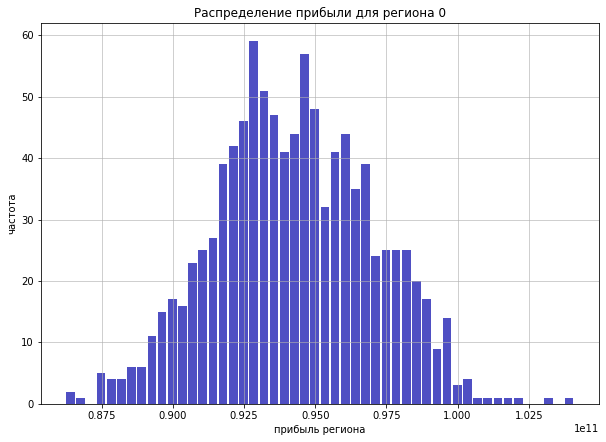

In [36]:
# оценим риск убытков для региона 0
def hist(values, title): 
    plt.rcParams["figure.figsize"] = (10, 7)
    plt.hist(x=values, bins=50, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    plt.grid(alpha=0.75)
    plt.xlabel('прибыль региона')
    plt.ylabel('частота')
    plt.title(title)
    print(values.describe())

hist(values_0, 'Распределение прибыли для региона 0')
# Видно, что убытков нет

In [37]:
values_1 = []
target_geo_data_1_valid = target_geo_data_1_valid.reset_index(drop=True)
for i in range(1000):
    target_subsample_1 = target_geo_data_1_valid.sample(n=500, replace=True, random_state = state)
    predictions_subsample_1 = predicted_valid_1[target_subsample_1.index]
    values_1.append(revenue(target_subsample_1, predictions_subsample_1, 200))
values_1 = pd.Series(values_1)
mean_1 = values_1.mean()
lower_1 = values_1.quantile(0.025)
upper_1 = values_1.quantile(0.975)
print('Средняя прибыль для региона 1:', mean_1)
print('Доверительный интервал для региона 1:', lower_1, ':', upper_1)

Средняя прибыль для региона 1: 95182594936.97325
Доверительный интервал для региона 1: 91281232314.33087 : 99536129820.66907


count    1.000000e+03
mean     9.518259e+10
std      2.096475e+09
min      8.859855e+10
25%      9.376425e+10
50%      9.510528e+10
75%      9.654132e+10
max      1.017613e+11
dtype: float64


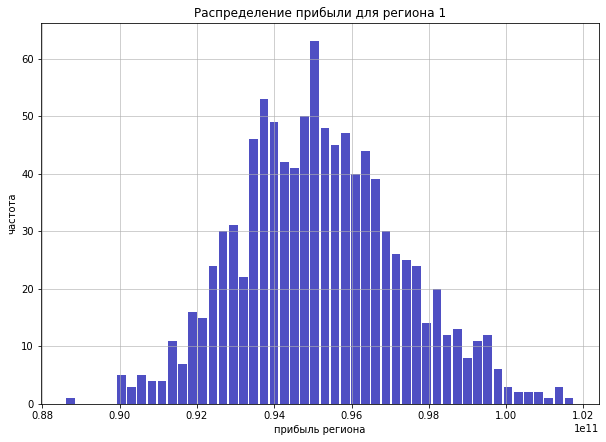

In [38]:
# Оценим риск убытков для региона 1
hist(values_1, 'Распределение прибыли для региона 1')
# Видно, что убытков нет

In [39]:
values_2 = []
target_geo_data_2_valid = target_geo_data_2_valid.reset_index(drop=True)
for i in range(1000):
    target_subsample_2 = target_geo_data_2_valid.sample(n=500, replace=True, random_state = state)
    predictions_subsample_2 = predicted_valid_2[target_subsample_2.index]
    values_2.append(revenue(target_subsample_2, predictions_subsample_2, 200))
values_2 = pd.Series(values_2)
mean_2 = values_2.mean()
lower_2 = values_2.quantile(0.025)
upper_2 = values_2.quantile(0.975)
print('Средняя прибыль для региона 2:', mean_2)
print('Доверительный интервал для региона 2:', lower_2, ':', upper_2)

Средняя прибыль для региона 2: 94201940053.4405
Доверительный интервал для региона 2: 88841473908.39989 : 99896299398.44576


count    1.000000e+03
mean     9.420194e+10
std      2.846731e+09
min      8.562081e+10
25%      9.212849e+10
50%      9.414664e+10
75%      9.621125e+10
max      1.047901e+11
dtype: float64


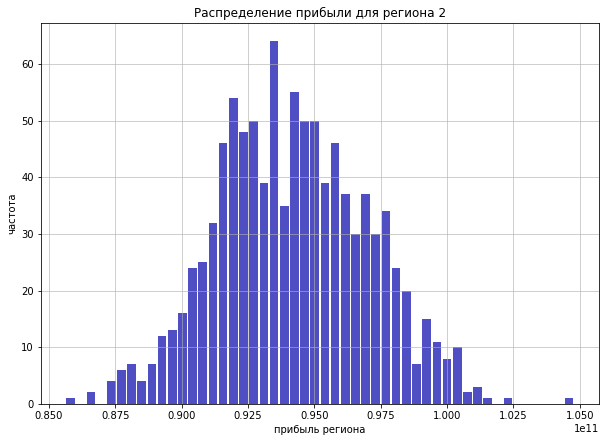

In [40]:
# Оценим риск убытков 
hist(values_2, 'Распределение прибыли для региона 2')
# Видно, что убытков нет

In [41]:
data = [['area_0', mean_0], ['area_1', mean_1], ['area_2', mean_2]]
columns = ['area', 'profit']
table = pd.DataFrame(data = data, columns = columns)
table

,area,profit
0,area_0,9.425939e+10
1,area_1,9.518259e+10
2,area_2,9.420194e+10


### Вывод

Исходя из полученных результатов, можно сделать предположение, что наиболее перспективным является регион 1, так как обладает наибольшей средней прибылью и не имеет убытков. Стоит отметить, что ни один регион не несет убытки. 

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован